In [1]:
# 
# 
root = "/home/shi/WorkSpace/projects/scMultiNet_Data/"

code_loc = "/Users/shipan/Documents/workspace_EMT_LM/scMultiNet_workspace/"

save_folder = root + "/Step_4_data/"

cls_nb = 8

force_normalise = True

In [2]:
import pandas as pd

# Load the CSV file
file_path = root + "/Step_4_data/source/Paul_emt_dataset_obs_signature_scores.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Unnamed: 0,Ground_truth,CellLine,stimulus,pseudotimes,Experiment,n_genes,Tissue,epithelial_score,mesenchymal_score,pEMT_score
0,V1_T0,T0,MCF10,TGFb,NaN,Paul,6619,Breast,4.445643,-1.461288,-10.661179
1,V2_T0,T0,MCF10,TGFb,NaN,Paul,5939,Breast,6.611839,0.696466,-3.748780
2,V3_T0,T0,MCF10,TGFb,NaN,Paul,6030,Breast,2.672188,-0.546850,-4.186382
3,V4_T0,T0,MCF10,TGFb,NaN,Paul,5126,Breast,1.480269,0.837131,-4.693089
4,V5_T0,T0,MCF10,TGFb,NaN,Paul,5565,Breast,3.576057,0.700709,-1.193089


In [3]:
if force_normalise:
    # normalise epithelial_score, mesenchymal_score, and pEMT_score to 0-1
    data["epithelial_score"] = (data["epithelial_score"] - data["epithelial_score"].min()) / (data["epithelial_score"].max() - data["epithelial_score"].min())
    data["mesenchymal_score"] = (data["mesenchymal_score"] - data["mesenchymal_score"].min()) / (data["mesenchymal_score"].max() - data["mesenchymal_score"].min())
    data["pEMT_score"] = (data["pEMT_score"] - data["pEMT_score"].min()) / (data["pEMT_score"].max() - data["pEMT_score"].min())

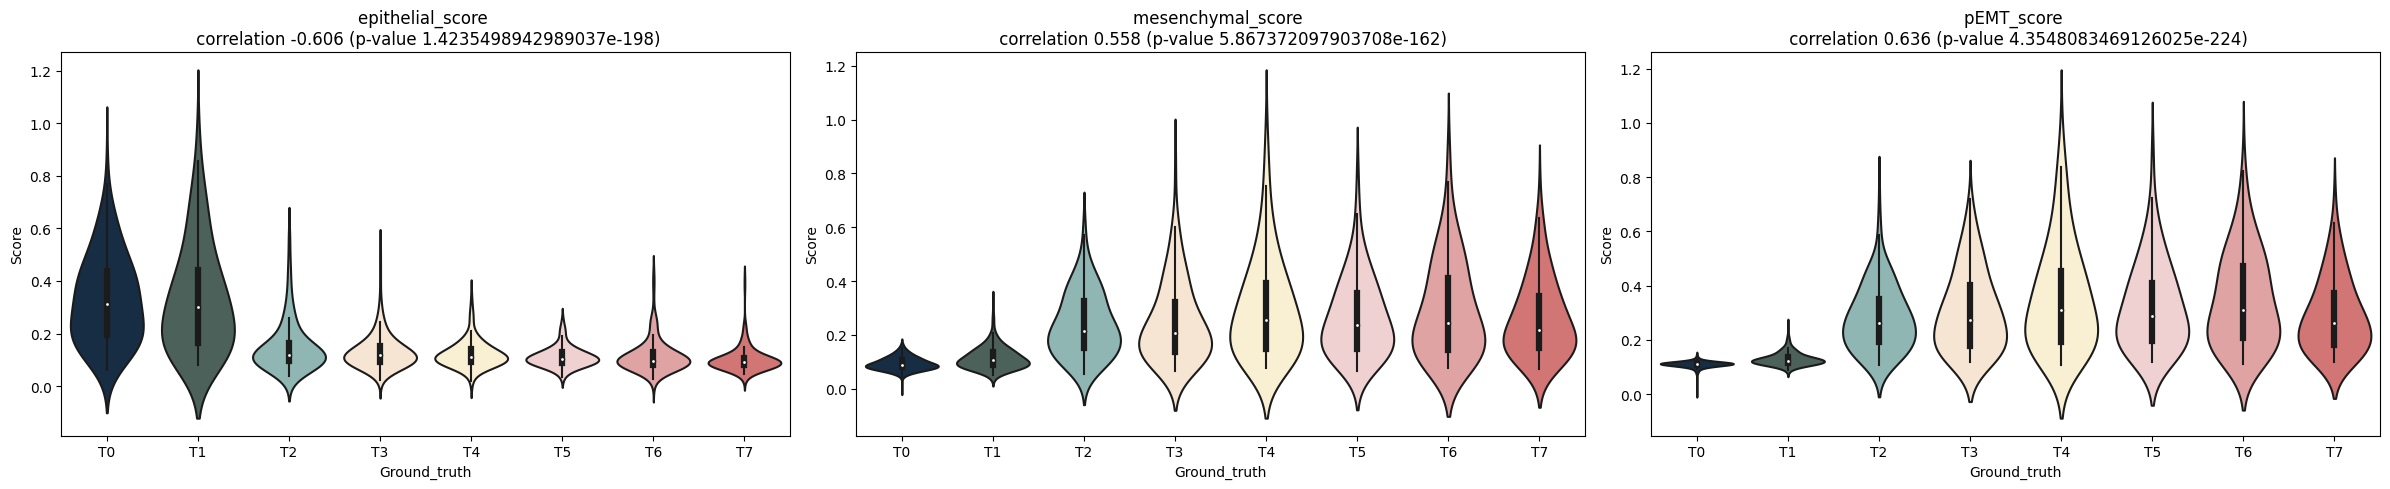

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

subgfig_nb = 3

# Map Ground_truth to numeric values
ground_truth_mapping = {gt: i for i, gt in enumerate(sorted(data['Ground_truth'].unique()))}
data['Ground_truth_numeric'] = data['Ground_truth'].map(ground_truth_mapping)

# Define targets
targets = ['epithelial_score', 'mesenchymal_score', 'pEMT_score']


hex_colors =  ["#102d4b","#47655b","#89bcb8","#fce5cd","#fff2cc","#f4cccc","#ea9999","#e06666"]
color_palette = sns.color_palette(hex_colors)  # 将十六进制颜色转换为Seaborn可用的颜色格式

# Initialize figure and axes for 3 subplots
fig, axes = plt.subplots(1, subgfig_nb, figsize=(8*subgfig_nb, 5))#, sharey=True)
#fig.subplots_adjust(hspace=0.8, wspace=0.2)

# Store correlation and p-value information
correlation_info = {}

# Create violin plots
for i, target in enumerate(targets):
    sns.violinplot(ax=axes[i], x='Ground_truth', y=target, data=data,palette=hex_colors,
                   bw=0.5,scale='width',
                   inner="box", order=sorted(data['Ground_truth'].unique()))
    
    correlation, p_value = stats.spearmanr(data['Ground_truth_numeric'], data[target])
    axes[i].set_title(f"{target} \n correlation {correlation:0.3f} (p-value {p_value})")
    axes[i].set_xlabel('Ground_truth')
    axes[i].set_ylabel('Score')


# Adjust layout
plt.tight_layout()

plt.savefig(save_folder+"/other_idx_paul.pdf")
# Show plot
plt.show()




/var/folders/y2/l_8q7qw56_x9sqpbx0__tbg80000gn/T/ipykernel_23618/846892630.py:28: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i], x='Ground_truth', y=target, data=data, palette=hex_colors,order=sorted(data['Ground_truth'].unique()),jitter=True)
/var/folders/y2/l_8q7qw56_x9sqpbx0__tbg80000gn/T/ipykernel_23618/846892630.py:28: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i], x='Ground_truth', y=target, data=data, palette=hex_colors,order=sorted(data['Ground_truth'].unique()),jitter=True)
/var/folders/y2/l_8q7qw56_x9sqpbx0__tbg80000gn/T/ipykernel_23618/846892630.py:28: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i], x='Ground_truth', y=target, data=data, palette=hex_colors,order=sorted(data['Ground_truth'].unique()),jitter=True)


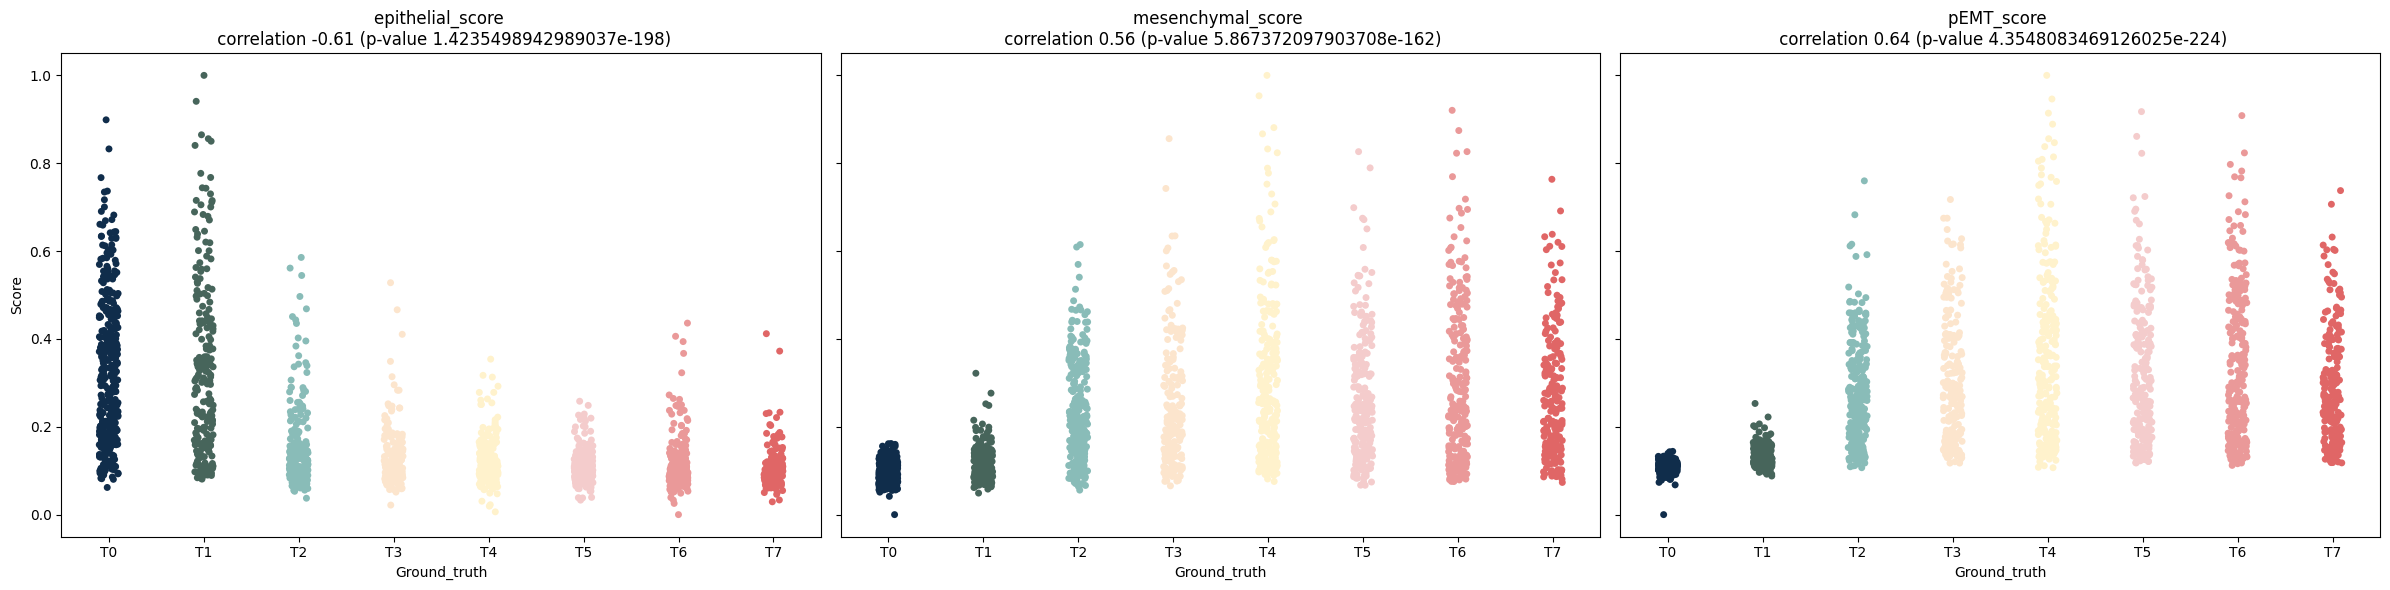

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

subgfig_nb = 3

# Map Ground_truth to numeric values
ground_truth_mapping = {gt: i for i, gt in enumerate(sorted(data['Ground_truth'].unique()))}
data['Ground_truth_numeric'] = data['Ground_truth'].map(ground_truth_mapping)

# Define targets
targets = ['epithelial_score', 'mesenchymal_score', 'pEMT_score']


hex_colors =  ["#102d4b","#47655b","#89bcb8","#fce5cd","#fff2cc","#f4cccc","#ea9999","#e06666"]
color_palette = sns.color_palette(hex_colors)  # 将十六进制颜色转换为Seaborn可用的颜色格式

# Initialize figure and axes for 3 subplots
fig, axes = plt.subplots(1, subgfig_nb, figsize=(8*subgfig_nb, 6), sharey=True)
#fig.subplots_adjust(hspace=0.8, wspace=0.2)

# Store correlation and p-value information
correlation_info = {}

# Create violin plots
for i, target in enumerate(targets):
    # 绘制点图，并使用定义的颜色
    sns.stripplot(ax=axes[i], x='Ground_truth', y=target, data=data, palette=hex_colors,order=sorted(data['Ground_truth'].unique()),jitter=True)
    correlation, p_value = stats.spearmanr(data['Ground_truth_numeric'], data[target])
    axes[i].set_title(f"{target} \n correlation {correlation:0.2f} (p-value {p_value})")
    axes[i].set_xlabel('Ground_truth')
    axes[i].set_ylabel('Score')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


